In [1]:
%%capture
from keras.datasets import mnist

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
type(train_images)

numpy.ndarray

In [4]:
train_images.dtype

dtype('uint8')

In [5]:
train_images.ndim

3

In [6]:
train_images.shape

(60000, 28, 28)

In [36]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

IndexError: too many indices for array

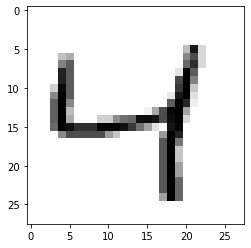

In [9]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

In [10]:
type(train_labels)

numpy.ndarray

In [11]:
train_labels.shape

(60000,)

In [12]:
train_labels[1]

0

In [13]:
train_labels[2]

4

In [14]:
type(test_images)

numpy.ndarray

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
test_images.ndim

3

In [17]:
test_labels.shape

(10000,)

In [19]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

In [20]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [21]:
train_images.shape

(60000, 784)

In [23]:
test_images.shape

(10000, 784)

In [24]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [26]:
from keras import models
from keras import layers

In [27]:
model = models.Sequential()

In [28]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax"))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [32]:
model.fit(train_images,
         train_labels,
         epochs = 5,
         batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2560 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1034 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0679 - accuracy: 0.9799
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0494 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0373 - accuracy: 0.9888


In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

10000/10000 [==============================] - 1s 51us/step
test_loss :  0.06573833876058925 
test_acc :  0.980400025844574
